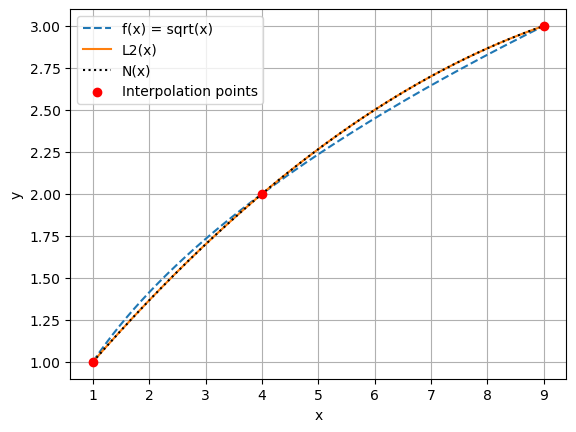

[1.         1.01990245 1.03942388 1.05858538 1.07740615 1.09590375
 1.11409426 1.13199251 1.14961213 1.16696574 1.18406505 1.20092092
 1.21754345 1.23394208 1.25012562 1.26610232 1.2818799  1.29746564
 1.31286636 1.32808851 1.34313815 1.35802103 1.37274255 1.38730787
 1.40172184 1.4159891  1.43011403 1.44410081 1.45795341 1.47167563
 1.48527107 1.49874319 1.51209529 1.52533051 1.53845187 1.55146227
 1.56436447 1.57716112 1.58985477 1.60244788 1.61494279 1.62734176
 1.63964698 1.65186053 1.66398444 1.67602065 1.68797104 1.69983741
 1.71162152 1.72332506 1.73494964 1.74649685 1.75796822 1.76936522
 1.78068927 1.79194176 1.80312403 1.81423738 1.82528307 1.83626232
 1.8471763  1.85802619 1.86881308 1.87953806 1.89020219 1.90080649
 1.91135196 1.92183957 1.93227026 1.94264494 1.9529645  1.96322983
 1.97344176 1.98360111 1.9937087  2.0037653  2.01377168 2.02372859
 2.03363674 2.04349686 2.05330962 2.06307572 2.0727958  2.08247051
 2.09210048 2.10168633 2.11122865 2.12072804 2.13018507 2.1396

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sqrt(x)

def L2(x):
    l0 = (1/24) * (x-4)*(x-9)
    l1 = (2/15) * (x-1)*(x-9)
    l2 = (3/40) * (x-1)*(x-4)
    return l0-l1+l2

def N(x):
    return 1 + ((1/3)*(x-1)) - ((1/60)*(x-1)*(x-4))

def N2(x):
    return (-15 + 11*(x+2) -4*(x+2)*(x+1) + (x+2)*(x+1)*x)

x_vals = np.linspace(1, 9, 200)
y_lagrange = L2(x_vals)
y_func = f(x_vals)
y_newton = N(x_vals)
y_newton2 = N2(x_vals)


plt.plot(x_vals, y_func, label='f(x) = sqrt(x)', linestyle='--')
plt.plot(x_vals, y_lagrange, label='L2(x)')
plt.plot(x_vals, y_newton, label='N(x)', linestyle=':', color='black')
plt.scatter([1, 4, 9], [1, 2, 3], color='red', zorder=5, label='Interpolation points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f(x_vals))
print(L2(x_vals))
print(N(x_vals))


In [24]:
import numpy as np

def lagrange_interpolation(x_points, y_points, x):
    # x_points and y_points should be lists
    n = len(x_points)
    result = 0
    for i in range(n):
        term = y_points[i]
        for j in range(n):
            if i != j:
                term = term * (x - x_points[j]) / (x_points[i] - x_points[j])
        result = result + term
    return result

def newton_interpolation(x_points, y_points, x):
    # x_points and y_points should be lists
    n = len(x_points)
    # Compute divided differences
    coef = [y for y in y_points]
    for j in range(1, n):
        for i in range(n-1, j-1, -1):
            coef[i] = (coef[i] - coef[i-1]) / (x_points[i] - x_points[i-j])
    # Evaluate Newton polynomial at x
    result = coef[-1]
    for k in range(n-2, -1, -1):
        result = result * (x - x_points[k]) + coef[k]
    return result

x_points = [-2, -1, 0, 1, 2]
y_points = [-15, -4, -1, 0, 5]
x = 5



print("Lagrange: ", lagrange_interpolation(x_points, y_points, x))
print("Newton: ", newton_interpolation(x_points, y_points, x))

Lagrange:  104.0
Newton:  104.0
